# Punto de Pandas

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Join DataFrame

In [4]:
#Lectura de datos
data_1 = {
        'id': ['1', '2', '3', '4', '5'],
        'primer_nombre': ['Alex', 'Amy', 'Valentina', 'Alice', 'Lina'], 
        'apellido': ['Anderson', 'Ruales', 'Marin', 'Barbosa', 'Robles']}

data_2 = {
        'id': ['4', '5', '6', '7', '8'],
        'primer_nombre': ['Luis', 'Brian', 'Mariana', 'Marcela', 'Carlos'], 
        'apellido': ['Ruiz', 'Giralgo', 'Ortegon', 'Palacios', 'Gallego']}

data_3 = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
#Creacion de dataframes
df1 = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)
df3 = pd.DataFrame(data_3)


In [9]:
#Union a lo largo de filas
rowUnion = pd.concat([df1, df2], axis=0)
rowUnion

id primer_nombre  apellido
0  1          Alex  Anderson
1  2           Amy    Ruales
2  3     Valentina     Marin
3  4         Alice   Barbosa
4  5          Lina    Robles
0  4          Luis      Ruiz
1  5         Brian   Giralgo
2  6       Mariana   Ortegon
3  7       Marcela  Palacios
4  8        Carlos   Gallego

In [11]:
#Union a lo largo de filas
columnUnion = pd.concat([df1, df2], axis=1)
columnUnion

id primer_nombre  apellido id primer_nombre  apellido
0  1          Alex  Anderson  4          Luis      Ruiz
1  2           Amy    Ruales  5         Brian   Giralgo
2  3     Valentina     Marin  6       Mariana   Ortegon
3  4         Alice   Barbosa  7       Marcela  Palacios
4  5          Lina    Robles  8        Carlos   Gallego

In [19]:
#Merge con todos los datos
totalMerge = pd.merge(df1, df2, how = 'outer').merge(df3, how = 'outer')
totalMerge

id primer_nombre  apellido  test_id
0    1          Alex  Anderson     51.0
1    2           Amy    Ruales     15.0
2    3     Valentina     Marin     15.0
3    4         Alice   Barbosa     61.0
4    4          Luis      Ruiz     61.0
5    5          Lina    Robles     16.0
6    5         Brian   Giralgo     16.0
7    6       Mariana   Ortegon      NaN
8    7       Marcela  Palacios     14.0
9    8        Carlos   Gallego     15.0
10   9           NaN       NaN      1.0
11  10           NaN       NaN     61.0
12  11           NaN       NaN     16.0

In [26]:
#Merge con el mismo id
sameId = pd.merge(df1, df2, on = 'id').merge(df3, on = 'id')
sameId

id primer_nombre_x apellido_x primer_nombre_y apellido_y  test_id
0  4           Alice    Barbosa            Luis       Ruiz       61
1  5            Lina     Robles           Brian    Giralgo       16

### GroupBy

In [36]:
#Lectura de datos
alcohol = pd.read_csv("../data/datos_alcohol.txt")
alcohol

pais  porciones_cerveza  porciones_licor  porciones_vino  \
0    Afghanistan                  0                0               0   
1        Albania                 89              132              54   
2        Algeria                 25                0              14   
3        Andorra                245              138             312   
4         Angola                217               57              45   
..           ...                ...              ...             ...   
188    Venezuela                333              100               3   
189      Vietnam                111                2               1   
190        Yemen                  6                0               0   
191       Zambia                 32               19               4   
192     Zimbabwe                 64               18               4   

     litros_totales_de_alcohol_puro continente  
0                               0.0         AS  
1                               4.9         EU  
2                               0.7         AF  
3                              12.4         EU  
4                               5.9         AF  
..                              ...        ...  
188                             7.7         SA  
189                             2.0         AS  
190                             0.1         AS  
191                             2.5         AF  
192                             4.7         AF  

[193 rows x 6 columns]

In [34]:
#Se agrupan los datos por continente y se le saca la media a los datos
alcohol.groupby('continente').mean()

porciones_cerveza  porciones_licor  porciones_vino  \
continente                                                       
AF                  61.471698        16.339623       16.264151   
AS                  37.045455        60.840909        9.068182   
EU                 193.777778       132.555556      142.222222   
OC                  89.687500        58.437500       35.625000   
SA                 175.083333       114.750000       62.416667   

            litros_totales_de_alcohol_puro  
continente                                  
AF                                3.007547  
AS                                2.170455  
EU                                8.617778  
OC                                3.381250  
SA                                6.308333

El continente que en promedio toma más cerveza es EU

**-** Se toman las columnas de continentes y porciones de vino, para luego agrupar por continente y hacer una descripción general de las porciones de vino por cada continente

In [44]:
alcohol[["continente", "porciones_vino"]].groupby("continente").describe()

porciones_vino                                                   \
                    count        mean        std  min   25%    50%     75%   
continente                                                                   
AF                   53.0   16.264151  38.846419  0.0   1.0    2.0   13.00   
AS                   44.0    9.068182  21.667034  0.0   0.0    1.0    8.00   
EU                   45.0  142.222222  97.421738  0.0  59.0  128.0  195.00   
OC                   16.0   35.625000  64.555790  0.0   1.0    8.5   23.25   
SA                   12.0   62.416667  88.620189  1.0   3.0   12.0   98.50   

                   
              max  
continente         
AF          233.0  
AS          123.0  
EU          370.0  
OC          212.0  
SA          221.0

De forma similiar se realiza para las porciones de licor, la columna mean corresponde al valor medio de consumo de licor para cada continente; La columna min el valor mínimo; La columna max al valor máximo.

In [62]:
alcohol[["continente", "porciones_licor"]].groupby("continente").describe()["porciones_licor"][["mean", "min", "max"]]

mean   min    max
continente                         
AF           16.339623   0.0  152.0
AS           60.840909   0.0  326.0
EU          132.555556   0.0  373.0
OC           58.437500   0.0  254.0
SA          114.750000  25.0  302.0

Para obtener el consumo medio de alcohol por continente, se hace un groupby, luego se saca el promedio y por ultimo sumamos los respectivos valores

In [73]:
alcohol.groupby("continente").mean().sum(axis=1)

continente
AF     97.083019
AS    109.125000
EU    477.173333
OC    187.131250
SA    358.558333
dtype: float64

### Visualización

In [90]:
#Leemos los datos y eliminamos la primer columna de indices
visualizacion = pd.read_csv("../data/visulualizacion.txt").drop(['Unnamed: 0'], axis = 1)
visualizacion

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

Text(0, 0.5, 'Counts')

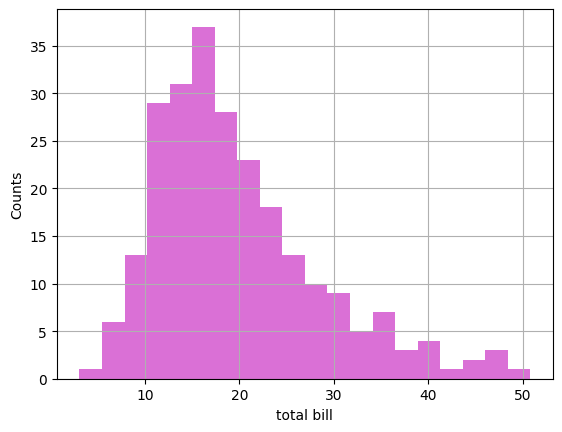

In [125]:
#Histograma columna total_bill
visualizacion["total_bill"].hist(bins = 20, color = 'orchid')
plt.xlabel("total bill")
plt.ylabel('Counts')

<AxesSubplot: xlabel='total_bill', ylabel='bill / tip'>

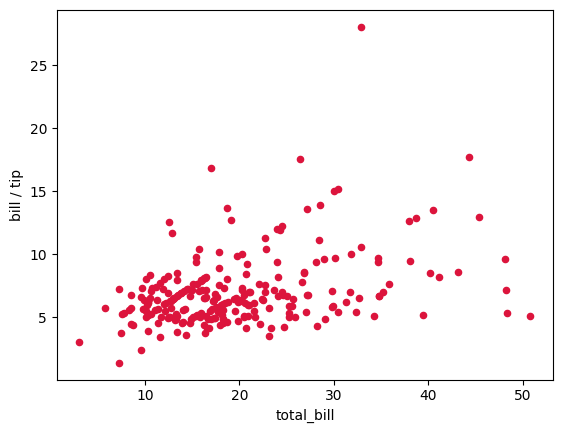

In [120]:
#Scatter plot de la relacion total_bill / tip, donde el eje x es la columna total_bill
visualizacion["bill / tip"] = visualizacion["total_bill"] / visualizacion["tip"] #Crea una nueva columna con la relación total_bill / tip
visualizacion.plot.scatter(x = "total_bill", y = "bill / tip", color = 'crimson')

c:\Users\josue\Desktop\Git-H-L\VP2\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='day', ylabel='total_bill'>

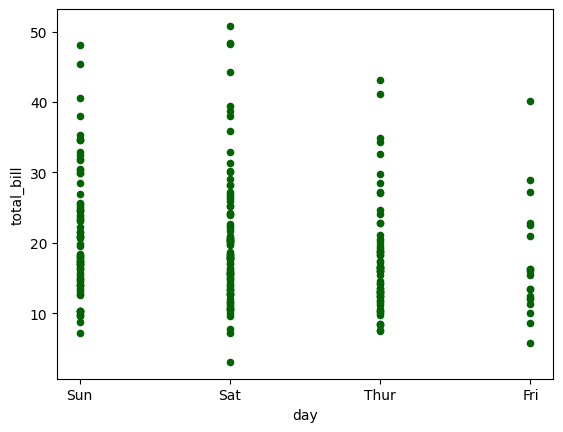

In [122]:
visualizacion.plot.scatter(x = "day", y = "total_bill", color = 'darkgreen')

In [117]:
#Box plots
visualizacion.boxplot("total_bill", by = "time")

<AxesSubplot: title={'center': 'total_bill'}, xlabel='time'>